Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [4]:
DATA_FOLDER = '../readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [5]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [6]:
transactions.head(n=10)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
5  10.01.2013               0       25     2564      349.00           1.0
6  02.01.2013               0       25     2565      549.00           1.0
7  04.01.2013               0       25     2572      239.00           1.0
8  11.01.2013               0       25     2572      299.00           1.0
9  03.01.2013               0       25     2573      299.00           3.0

In [7]:
items.head(n=10)

item_name  item_id  \
0          ! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.)         D        0   
1  !ABBYY FineReader 12 Professional Edition Full...        1   
2      ***В ЛУЧАХ СЛАВЫ   (UNV)                    D        2   
3    ***ГОЛУБАЯ ВОЛНА  (Univ)                      D        3   
4        ***КОРОБКА (СТЕКЛО)                       D        4   
5  ***НОВЫЕ АМЕРИКАНСКИЕ ГРАФФИТИ  (UNI)         ...        5   
6           ***УДАР ПО ВОРОТАМ (UNI)               D        6   
7         ***УДАР ПО ВОРОТАМ-2 (UNI)               D        7   
8           ***ЧАЙ С МУССОЛИНИ                     D        8   
9      ***ШУГАРЛЭНДСКИЙ ЭКСПРЕСС (UNI)             D        9   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
5                40  
6                40  
7                40  
8                40  
9                40

In [8]:
item_categories.head(n=10)

item_category_name  item_category_id
0  PC - Гарнитуры/Наушники                 0
1         Аксессуары - PS2                 1
2         Аксессуары - PS3                 2
3         Аксессуары - PS4                 3
4         Аксессуары - PSP                 4
5      Аксессуары - PSVita                 5
6    Аксессуары - XBOX 360                 6
7    Аксессуары - XBOX ONE                 7
8           Билеты (Цифра)                 8
9          Доставка товара                 9

In [9]:
shops.head(n=10)

shop_name  shop_id
0   !Якутск Орджоникидзе, 56 фран        0
1   !Якутск ТЦ "Центральный" фран        1
2                Адыгея ТЦ "Мега"        2
3  Балашиха ТРК "Октябрь-Киномир"        3
4        Волжский ТЦ "Волга Молл"        4
5          Вологда ТРЦ "Мармелад"        5
6      Воронеж (Плехановская, 13)        6
7          Воронеж ТРЦ "Максимир"        7
8    Воронеж ТРЦ Сити-Парк "Град"        8
9               Выездная Торговля        9

Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [10]:
df = transactions
df['year'] = df['date'].str[6:]
df['month'] = df['date'].str[3:5]
df['day_of_month'] = df['date'].str[0:2]
df['total_revenue'] = df['item_price'] * df['item_cnt_day']
transactions_sep_2014 = df[(df['year'] == '2014') & (df['month'] == '09')]
max_revenue = transactions_sep_2014.groupby(by=['shop_id']).sum()['total_revenue'].max()
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.2


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [11]:
items_item_id_and_categ_id = items.loc[:, ['item_id', 'item_category_id']]
transactions_with_item_categ_id = pd.merge(
    df,
    items_item_id_and_categ_id,
    how='left',
    on='item_id'
)
transactions_with_item_categ_id.head(n=10)

date  date_block_num  shop_id  item_id  item_price  item_cnt_day  \
0  02.01.2013               0       59    22154      999.00           1.0   
1  03.01.2013               0       25     2552      899.00           1.0   
2  05.01.2013               0       25     2552      899.00          -1.0   
3  06.01.2013               0       25     2554     1709.05           1.0   
4  15.01.2013               0       25     2555     1099.00           1.0   
5  10.01.2013               0       25     2564      349.00           1.0   
6  02.01.2013               0       25     2565      549.00           1.0   
7  04.01.2013               0       25     2572      239.00           1.0   
8  11.01.2013               0       25     2572      299.00           1.0   
9  03.01.2013               0       25     2573      299.00           3.0   

   year month day_of_month  total_revenue  item_category_id  
0  2013    01           02         999.00                37  
1  2013    01           03         899.00                58  
2  2013    01           05        -899.00                58  
3  2013    01           06        1709.05                58  
4  2013    01           15        1099.00                56  
5  2013    01           10         349.00                59  
6  2013    01           02         549.00                56  
7  2013    01           04         239.00                55  
8  2013    01           11         299.00                55  
9  2013    01           03         897.00                55

In [12]:
df = transactions_with_item_categ_id
transactions_summer_2014 = df[(df['year'] == '2014') & df['month'].isin(['06', '07', '08'])]
tmp = transactions_summer_2014.groupby(by=['item_category_id']).sum().sort_values(by='total_revenue', ascending=False)

In [13]:
category_id_with_max_revenue = tmp.index[0]
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [23]:
df = transactions
item_id_price = df.loc[:, ['item_id', 'item_price']].sort_values(by=['item_id', 'item_price'])
item_id_list = df['item_id'].unique().tolist()
item_id_constant_price_list = []
for tmp_id in item_id_list:
    prices_list = item_id_price[item_id_price['item_id'] == tmp_id]['item_price'].unique().tolist()
    if len(prices_list) == 1:
        item_id_constant_price_list.append(tmp_id)

In [24]:
num_items_constant_price = len(item_id_constant_price_list)
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [14]:
df = transactions
transactions_dec_2014_shop_25 = df[(df['shop_id'] == 25) & (df['month'] == '12') & (df['year'] == '2014')]
transactions_dec_2014_shop_25 = transactions_dec_2014_shop_25.loc[
    :,
    [
        #'date',
        'item_id',
        #'item_price',
        'item_cnt_day',
        'day_of_month',
        'total_revenue'
    ]
]
transactions_dec_2014_shop_25 = transactions_dec_2014_shop_25.sort_values(
    by=['day_of_month', 'item_id'], 
    ascending=True
)

In [15]:
tmp = """
transactions_dec_2014_shop_25[
    transactions_dec_2014_shop_25['item_cnt_day'] < 0
].sort_values(
    by=['item_id'], 
    ascending=[True]
)
"""

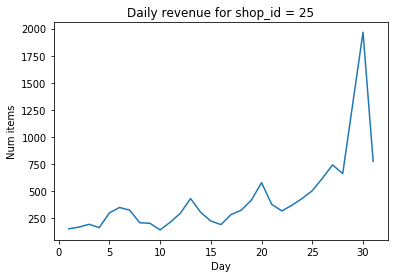

Current answer for task total_num_items_sold_var is: 117167.702299


In [35]:
total_num_items_sold = transactions_dec_2014_shop_25.groupby(
    by=['day_of_month'],
    as_index=False
).sum().loc[
    :,
    [
        'day_of_month',
        #'item_id',
        'item_cnt_day',
        'total_revenue'
    ]
]

# Plot it
plt.plot(
    total_num_items_sold['day_of_month'],
    total_num_items_sold.loc[:, 'item_cnt_day']
)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(
    a=total_num_items_sold['item_cnt_day'],
    ddof=1
)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [36]:
STUDENT_EMAIL = 'kirix.isakov@gmail.com'
STUDENT_TOKEN = 'gKaafrGYOS3QjbwX'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.2
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.702299


In [37]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)